### Chapter 7
### Exploratory data analysis with Housing Price Dataset
This notebook is a companion to the book XGBoost for Regression Predictive Modeling and Time Series Analysis. This chapter is a hands on guide for feature enineering designed to give you hands-on experience with exploratory data anslysis and different feature engineering techniques

### House Pricing Data Analysis.
The house price data is available here -[housing_price_data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

Citation for this dataset: `Dean De Cock(2011) Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project, Journal of Statistics Education, 19:3, DOI: 10.1080/10691898.2011.11889627. `

- importing dependencies 
- loading the data into `pandas`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)

from pprint import pprint

import gc

In [2]:
# load dataset
data = pd.read_csv('house_pricing.csv')

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# drop id column - as it is just an id
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

### Analysing the Data
**we will perform the following analysis**
- Analysis the target variable 

- Variable data types – categorical and numerical 

- Missing data analysis 

- Analysing numerical variables  such as discrete, continous,Distributions and Transformations 

- Analysing categorical variables such as cardinality, Rare Labels, Special mappings

### Target

- Analyse the Target variable's distribution

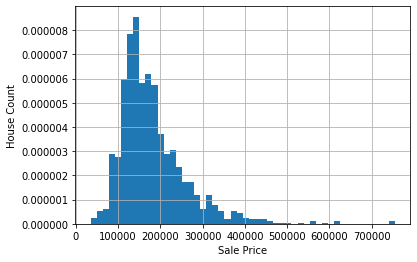

In [4]:
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('House Count')
plt.xlabel('Sale Price')
plt.show()

The distribution of the target variable is skewed to the right, there is scope to make it more `Gaussian`

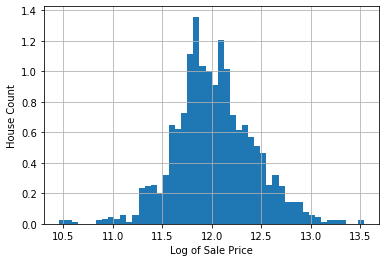

In [5]:
# Performing log transformation of the Target variable 

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('House Count')
plt.xlabel('Log of Sale Price')
plt.show()

The Distribution looks more Gaussian

### Identifying variable types
- Identifying the categorical and numerical variables

In [6]:
#Identifying the categorical variables

cat_vars = [var for var in data.columns if data[var].dtype == 'O']


MSSubClass is also a categorical variable although it numeric - you can find the definition of the variables in the data_description.txt 
[here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [7]:
# Adding MSSubClass to the list of cat_vars
cat_vars = cat_vars + ['MSSubClass']

#printing the categorical variables
print (cat_vars)

print ('       ')
print ('       ')
#printing the number of categorical variables
print (len(cat_vars))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']
       
       
44


In [8]:
#cast all categorical variables as variable
data[cat_vars] = data[cat_vars].astype('O')

# Identify the numerical variables 
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']
# print the numerical variables
print (num_vars)
print ('       ')
print ('       ')
#print the number of numerical variables
print (len(num_vars))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
       
       
35


### Analysing the missing values

- we will find the variables in the dataset that contain missing values

In [9]:
vars_missing = [var for var in data.columns if data[var].isnull().sum() > 0]

#find the percentage of missing values 

data[vars_missing].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

- Vizualizing the percentage of missing variables

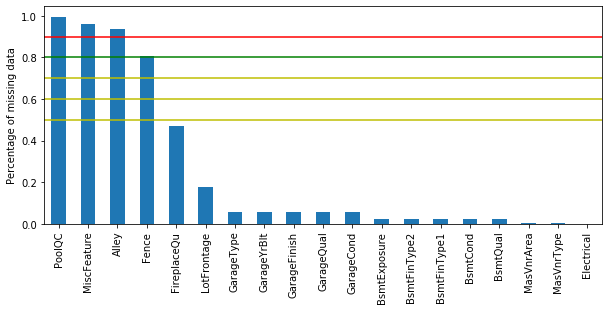

In [10]:

data[vars_missing].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')
plt.axhline(y=0.70, color='y', linestyle='-')
plt.axhline(y=0.60, color='y', linestyle='-')
plt.axhline(y=0.50, color='y', linestyle='-')

plt.show()

In [11]:
cat_missing = [var for var in vars_missing if var in cat_vars]
num_missing = [var for var in vars_missing if var in num_vars]

print('Number of categorical variables with na: ', len(cat_missing))
print('Number of numerical variables with na: ', len(num_missing))

Number of categorical variables with na:  16
Number of numerical variables with na:  3


In [12]:
pprint(num_missing)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [13]:
pprint(cat_missing)

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']


### Relationship between missing variables and the `Target variable` ($Sale Price$)



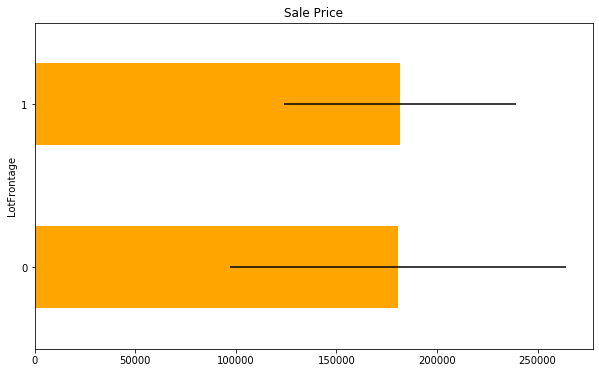

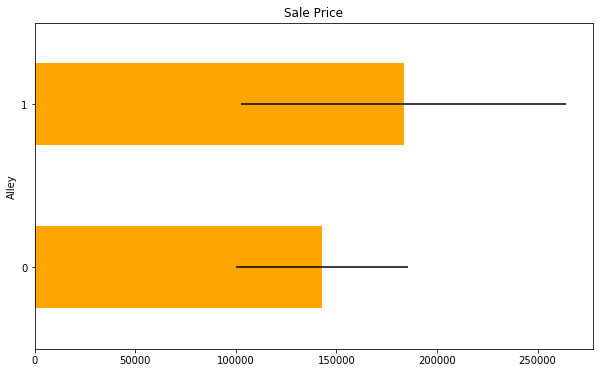

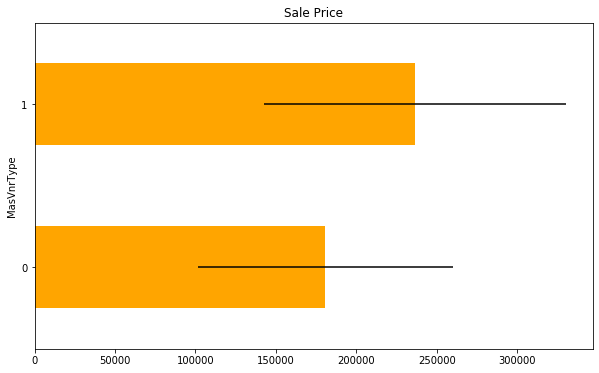

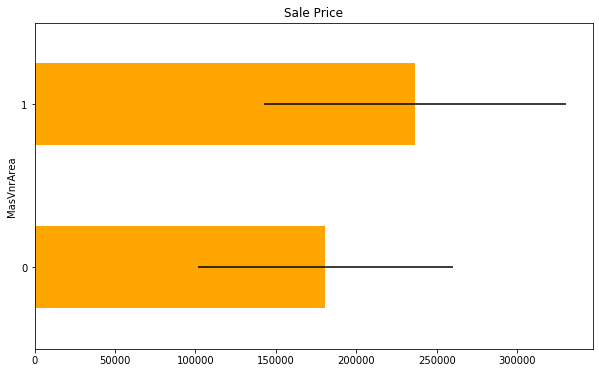

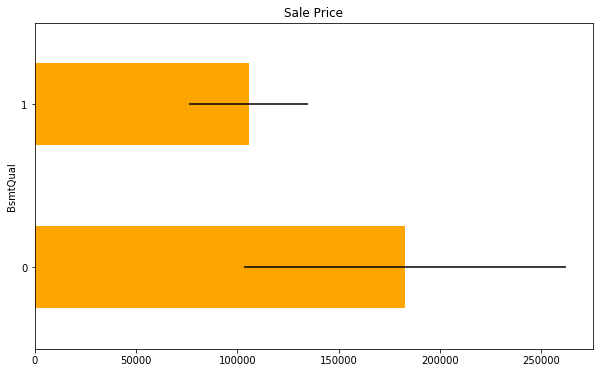

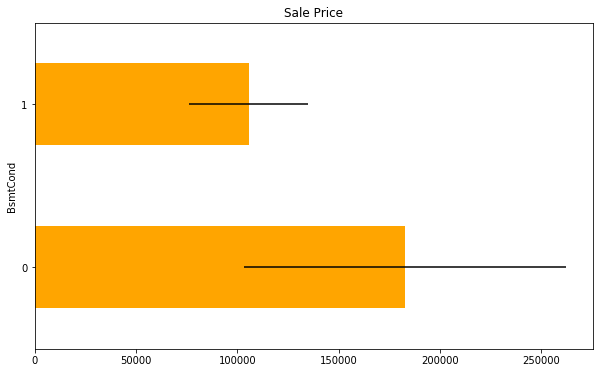

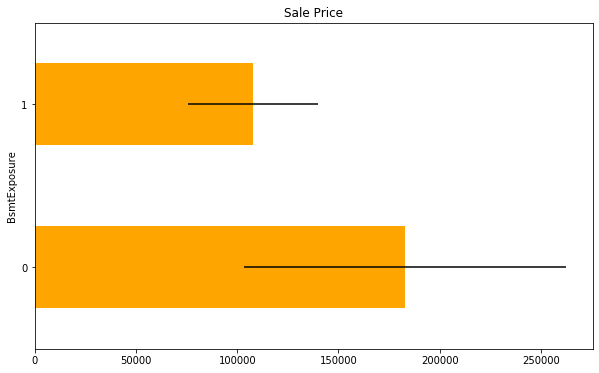

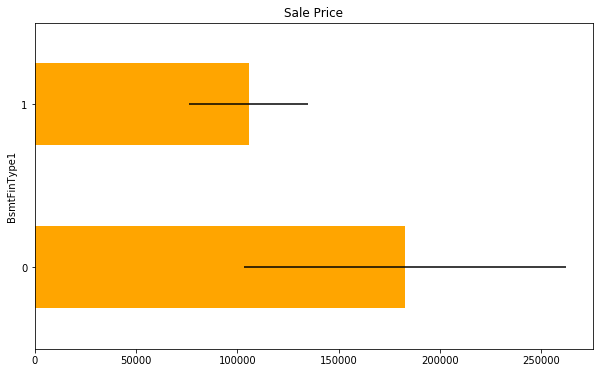

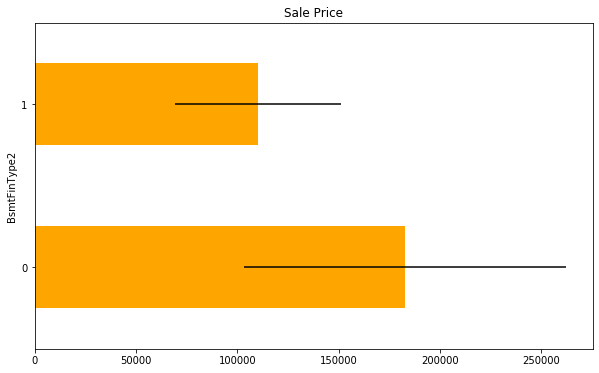

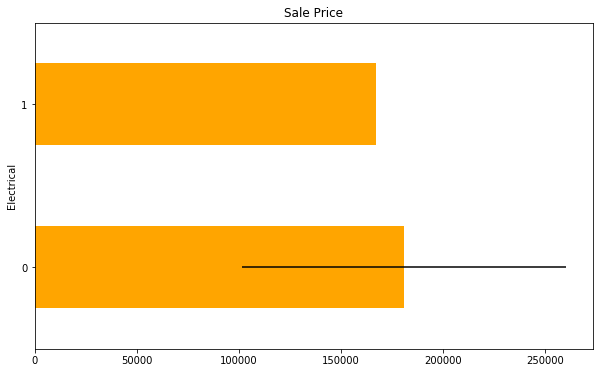

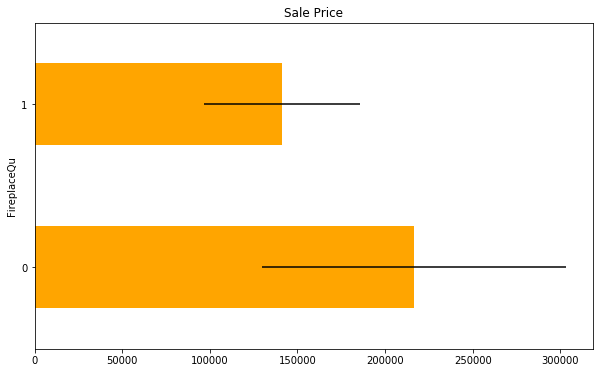

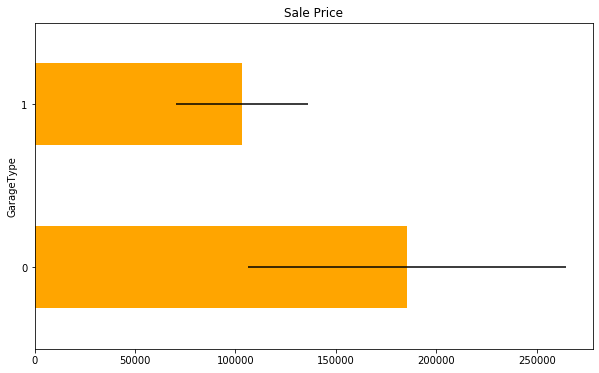

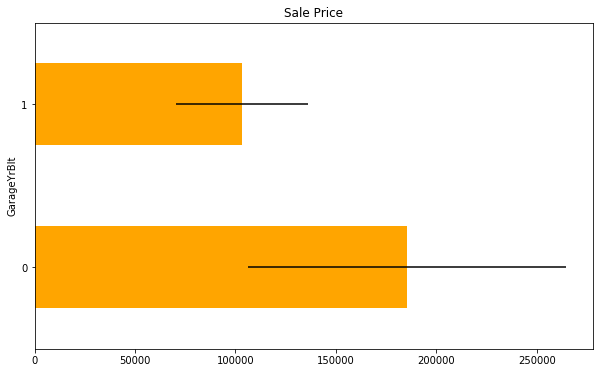

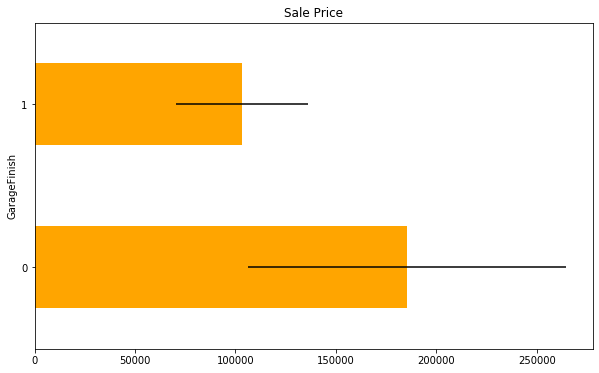

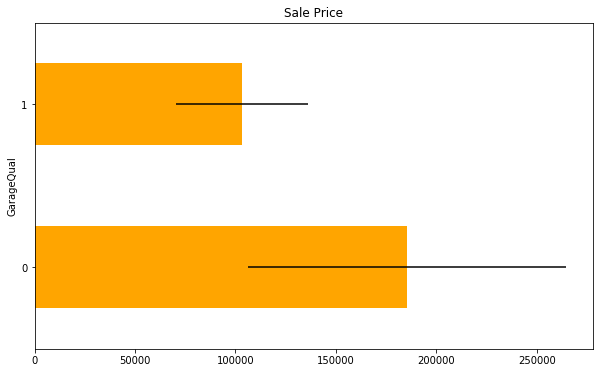

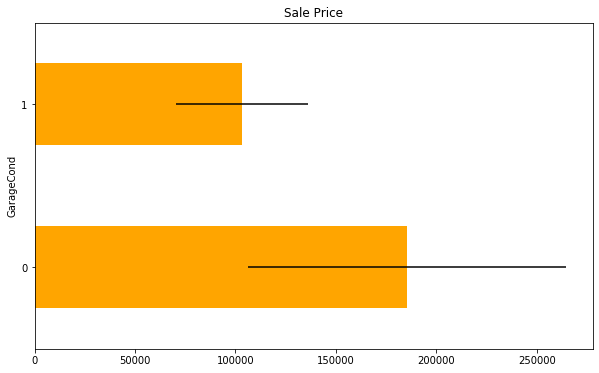

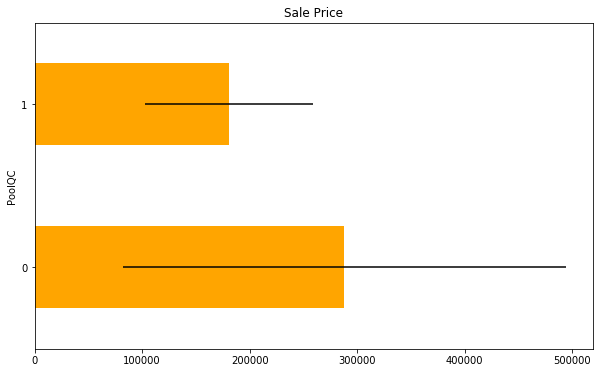

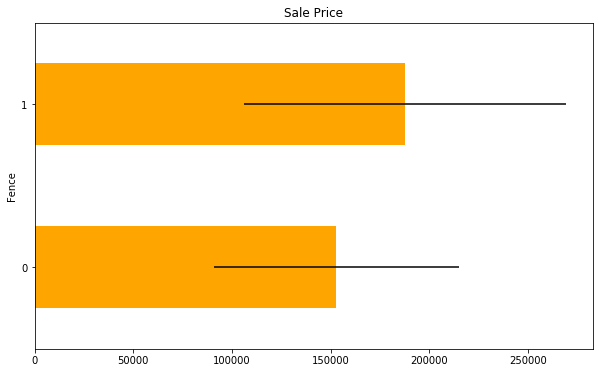

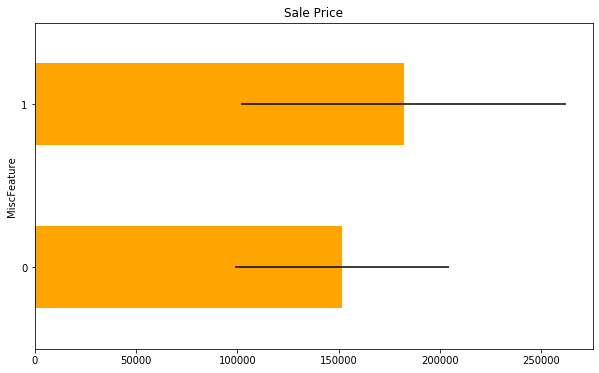

In [14]:
# let's run the function on each variable with missing data

for var in vars_missing:
    
    df = data.copy()

    # indicates 1 if data is missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the mean SalePrice where data is missing vs where data is available

    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    plt.rcParams['figure.figsize'] = [10, 6]

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='orange')
    
    gc.collect()

    plt.show()

 **An error bar is a line through a point on a graph, parallel to one of the axes, which represents the uncertainty or variation of the corresponding coordinate of the point**
 **. The reliability of the mean value as a representative number for the data set.  In other words, how accurately the mean value represents the data (small SD bar = more reliable, larger SD bar = less reliable)**

### Lets check the `numerical variables`

In [15]:
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


## Analysing `Temporal variables`

These are the following `Year` variables (please refer the data dscription [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)) :

- GarageYrBlt: Year garage was built
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- GarageYrBlt: Year garage was built

In [16]:
time_vars = [x for x in num_vars if 'Yr' in x or 'Year' in x]

time_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Lets explore these temporal variables

In [17]:
for x in time_vars:
    print (x, data[x].unique())
    print ()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

#### Lets plot the temporables by the median `sales Price`

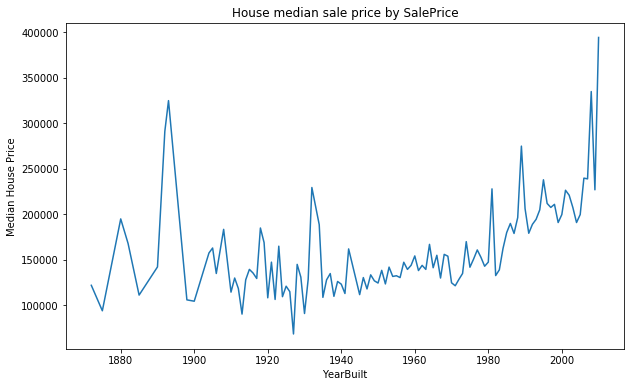

In [18]:
data.groupby('YearBuilt')['SalePrice'].median().plot(title = 'House median sale price by SalePrice')
plt.rcParams['figure.figsize'] = [10, 6]
plt.ylabel('Median House Price')
plt.show()

We can see that newly built / younger houses tend to be more expensive.

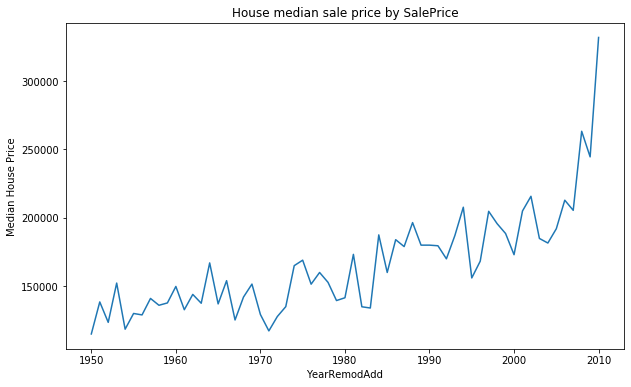

In [19]:
data.groupby('YearRemodAdd')['SalePrice'].median().plot(title = 'House median sale price by SalePrice')
plt.rcParams['figure.figsize'] = [10, 6]
plt.ylabel('Median House Price')
plt.show()

We can also see that latest remodelled houses tend to be more expensive

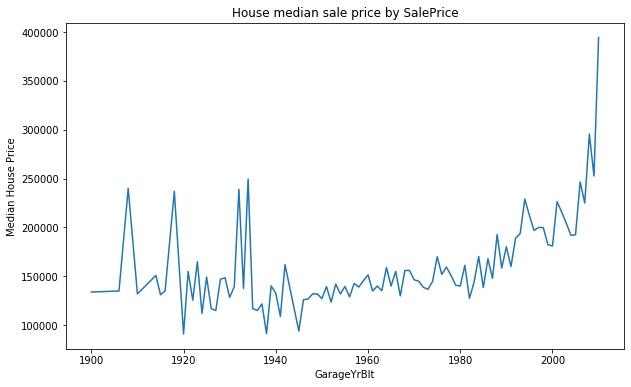

In [20]:
data.groupby('GarageYrBlt')['SalePrice'].median().plot(title = 'House median sale price by SalePrice')
plt.rcParams['figure.figsize'] = [10, 6]
plt.ylabel('Median House Price')
plt.show()

We can also see the house for which Garage is built recently tend to be more expensive

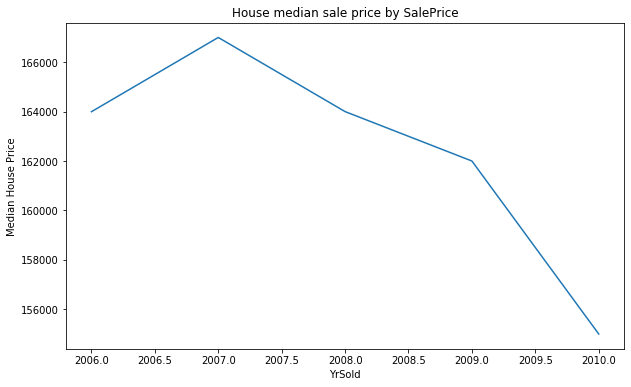

In [21]:
data.groupby('YrSold')['SalePrice'].median().plot(title = 'House median sale price by SalePrice')
plt.rcParams['figure.figsize'] = [10, 6]
plt.ylabel('Median House Price')
plt.show()

We can also see that the recently sold houses tend to be less expensive

Lets see if older houses are sold recently

For this, we will analyse yers difference between the Year variables and the year in which the house was sold


In [22]:
def year_var_analyse(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()

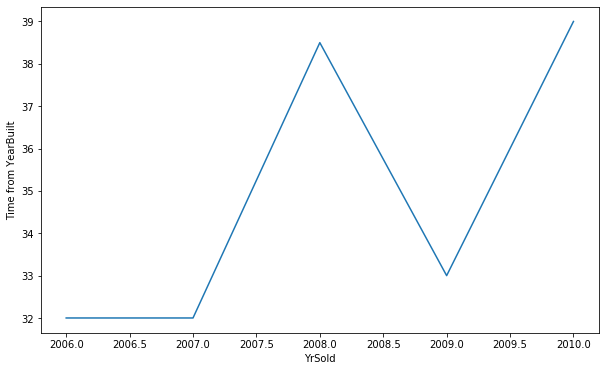

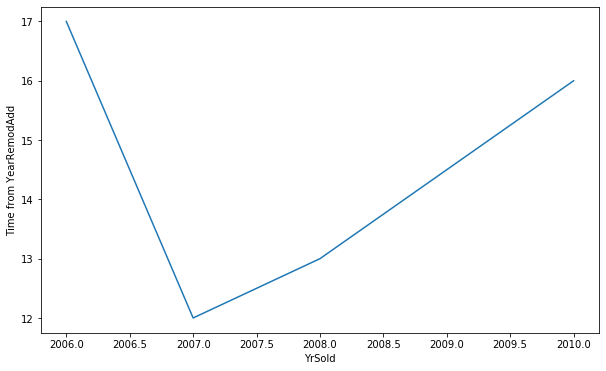

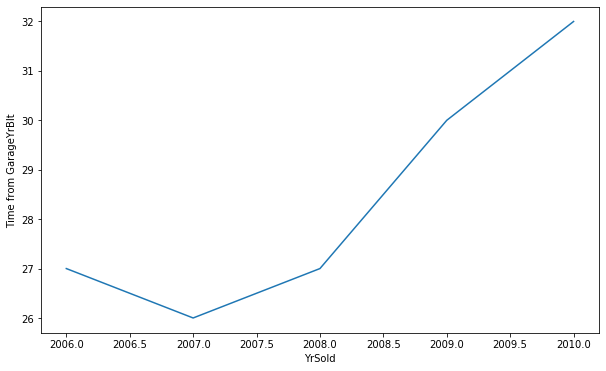

In [23]:
for var in time_vars:
    if var !='YrSold':
        year_var_analyse(data, var)

From the above plots we can see:
- Recently Old house were sold
- There is gap in years in remodelling of houses for the recently sold houses
- For the recently sold houses, there seemed to be gap in years when the Garages are built

#### Lets plot the sales Price by the:
- `Time from YearBuilt` 
- `Time from YearRemodAdd`
- `Time from GarageYrBlt`

In [24]:
def year_var_analyse_2(df, var):
    
    df = df.copy()
    

    df[var] = df['YrSold'] - df[var]
    
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel('Time from '+var)
    plt.show()
    

In [25]:
time_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

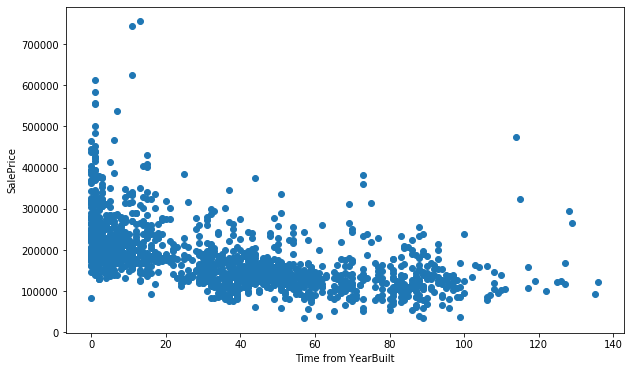

In [26]:
year_var_analyse_2(data, 'YearBuilt')

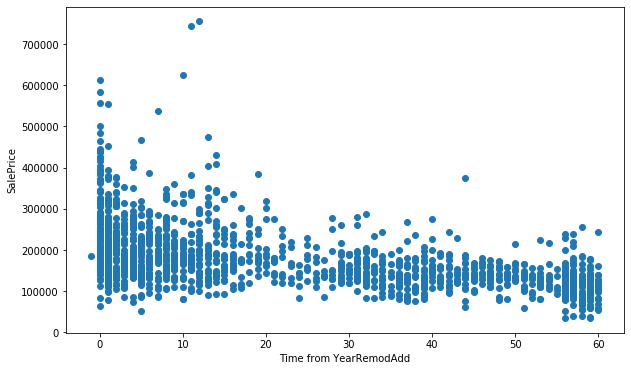

In [27]:
year_var_analyse_2(data, 'YearRemodAdd')

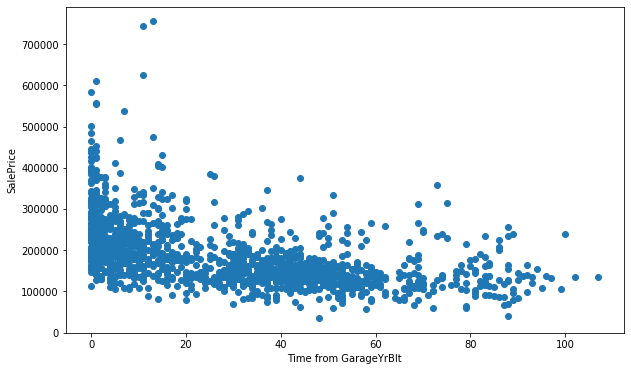

In [28]:
year_var_analyse_2(data, 'GarageYrBlt')

**we can see that longer the time between the house was built/remodeled/GarageBuilt and sale date, the lower the sale Price**

### Analysing `Discrete variables`
- Now, lets analyse the discrete variables within the numerical variables with < 30 unique/finite values 

In [29]:
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 30 and var not in time_vars]


print('Number of discrete variables: ', len(discrete_vars))
print ()
pprint(discrete_vars)

Number of discrete variables:  16

['OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']


### Analysing the distribution of these discrete variable to Target `Sales Price`

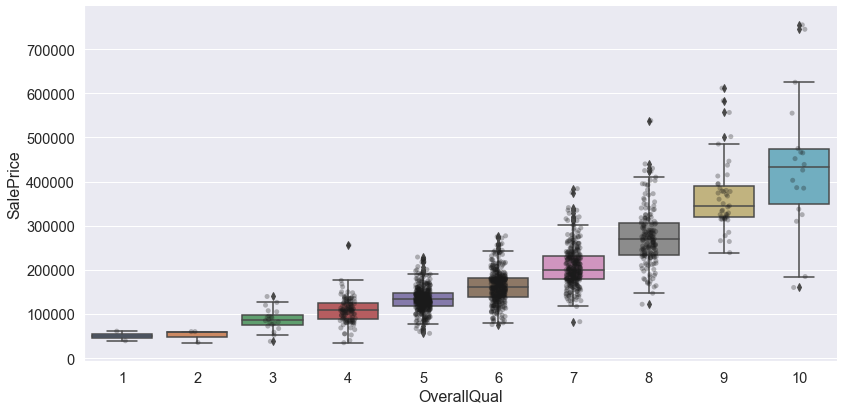

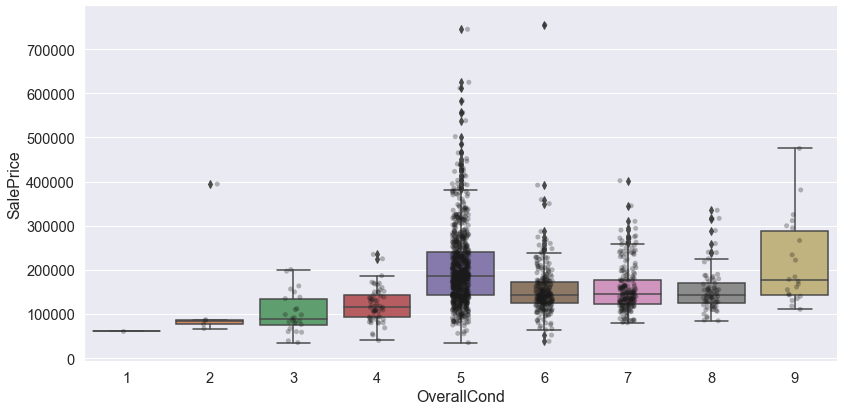

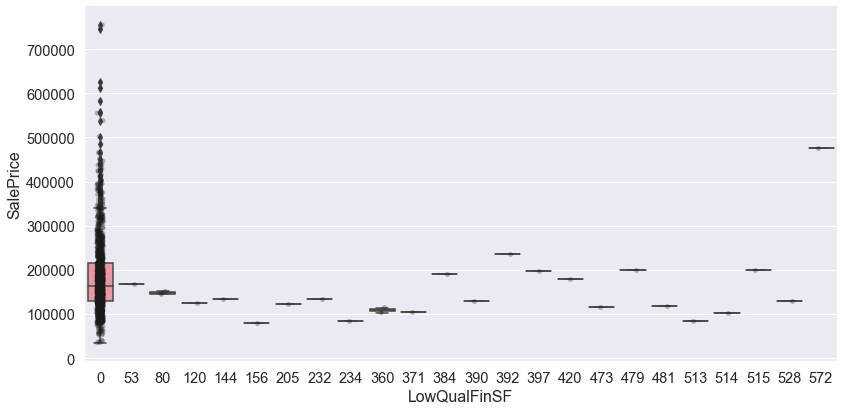

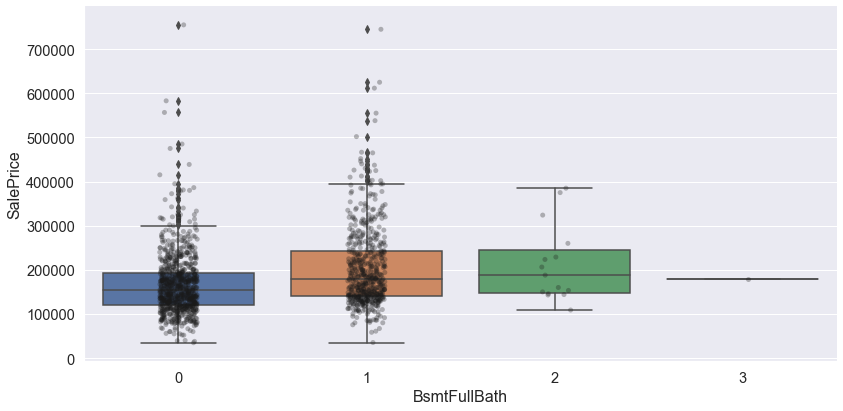

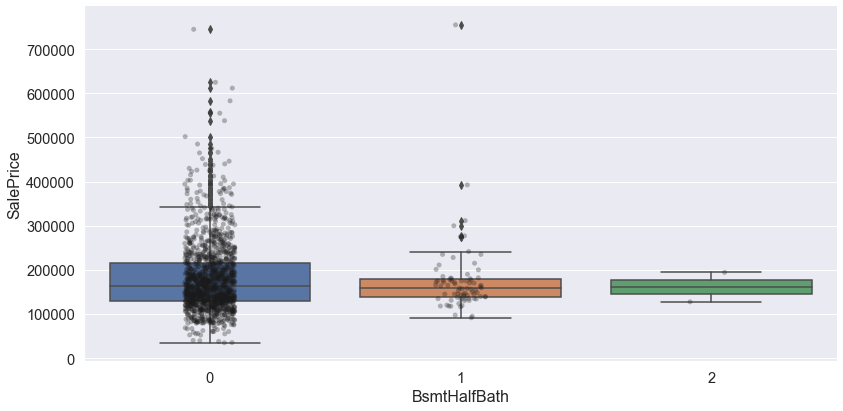

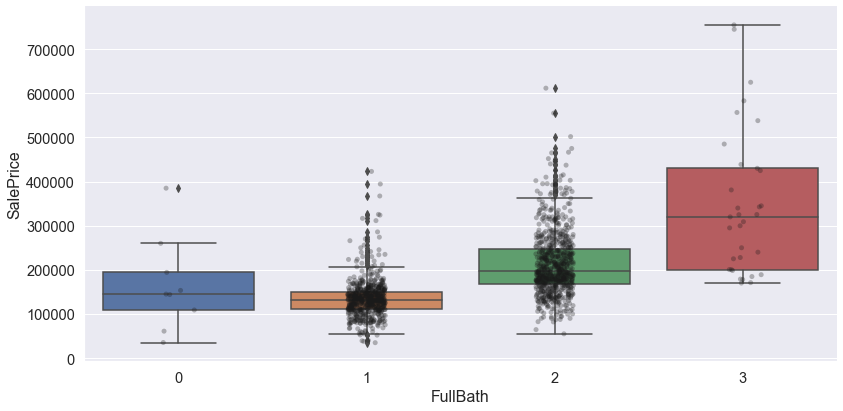

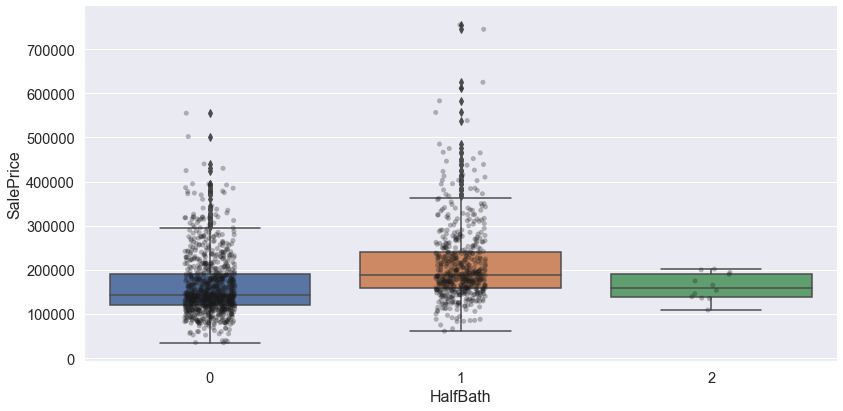

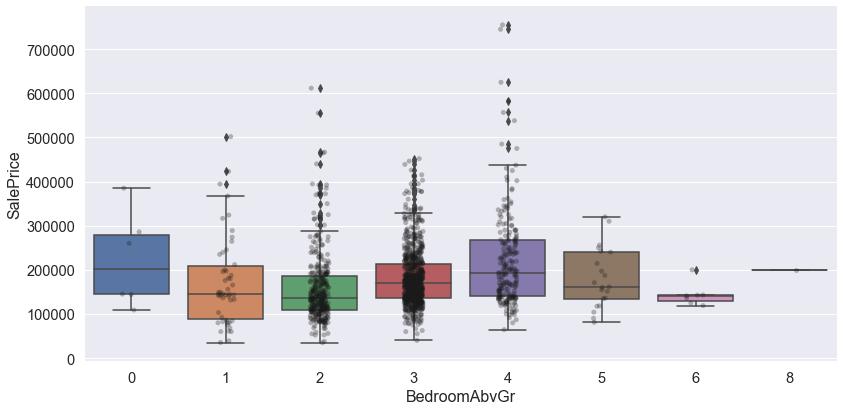

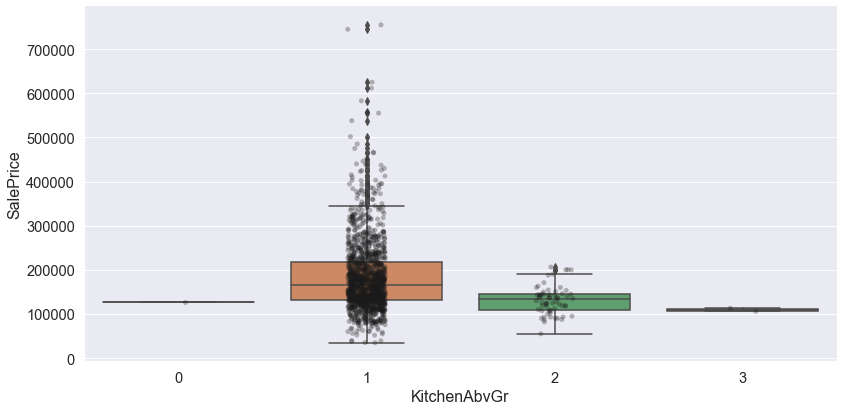

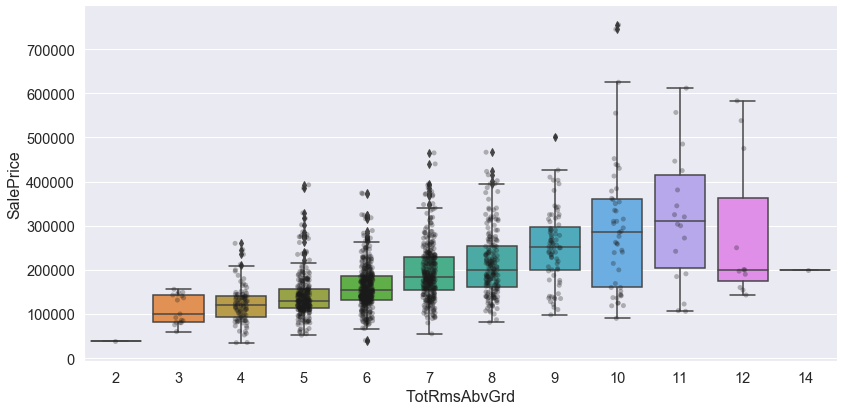

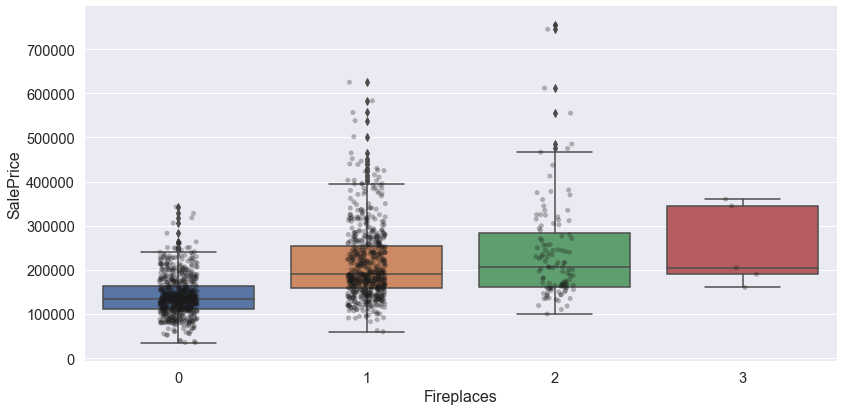

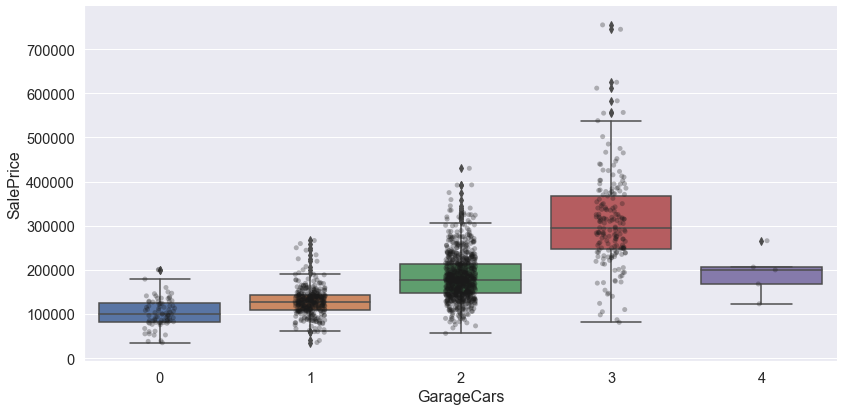

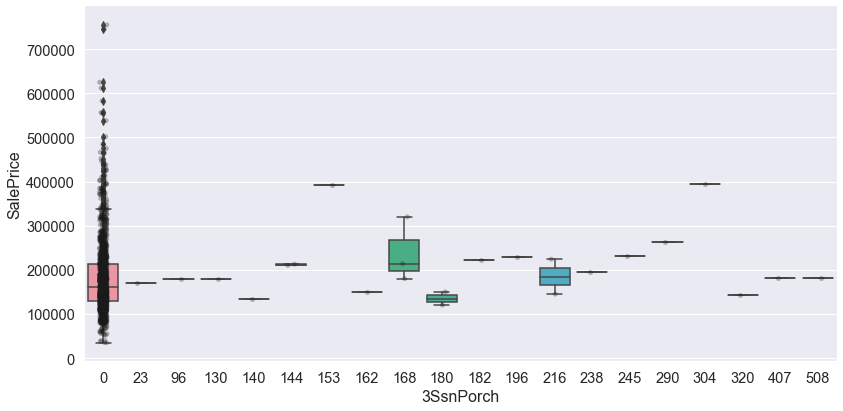

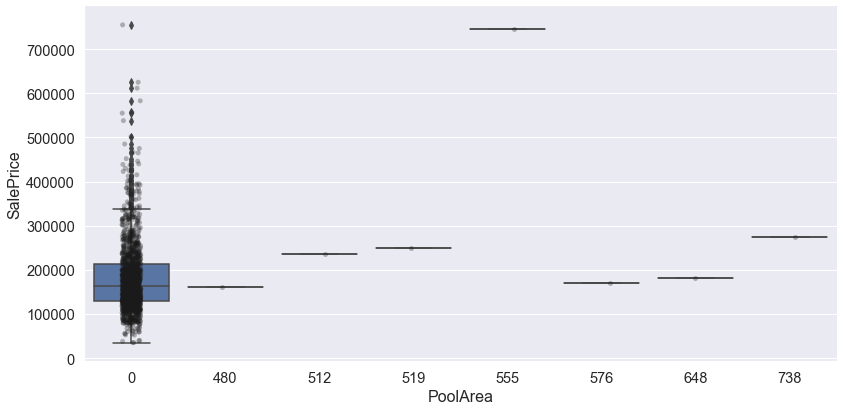

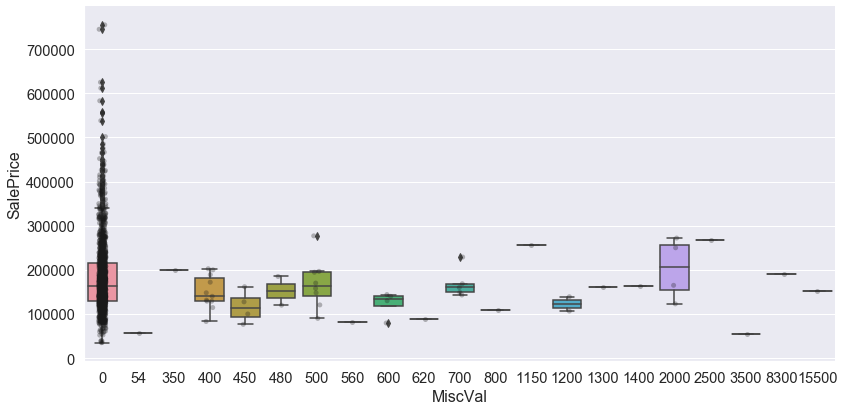

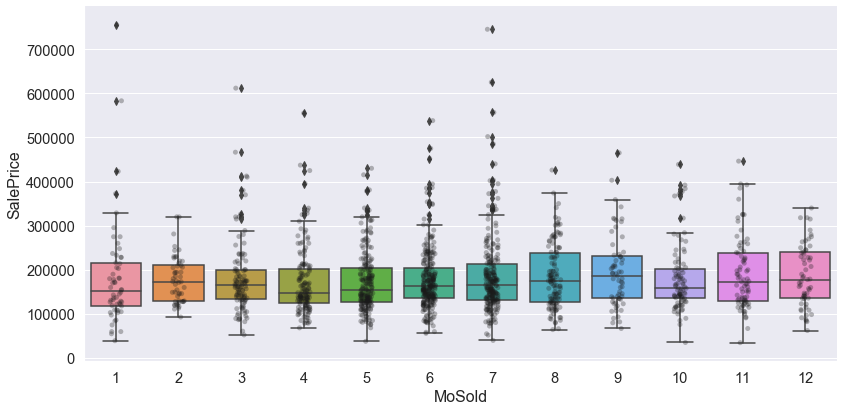

In [30]:
for var in discrete_vars:

    sns.set(font_scale=1.33)
    
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=6, aspect=2)

    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()


- we can see for most of them an increase in the sale price, with the overall quality, overall condition, or number of roomd etc

- But for some , we don't see tren. these variables may not be good predictors of sales Price

### Analysing the distribution of the of `numerical(continous variables)` (not temporal or discrete)

In [37]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+time_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  15


#### Visualizing the continous variables

In [38]:
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0


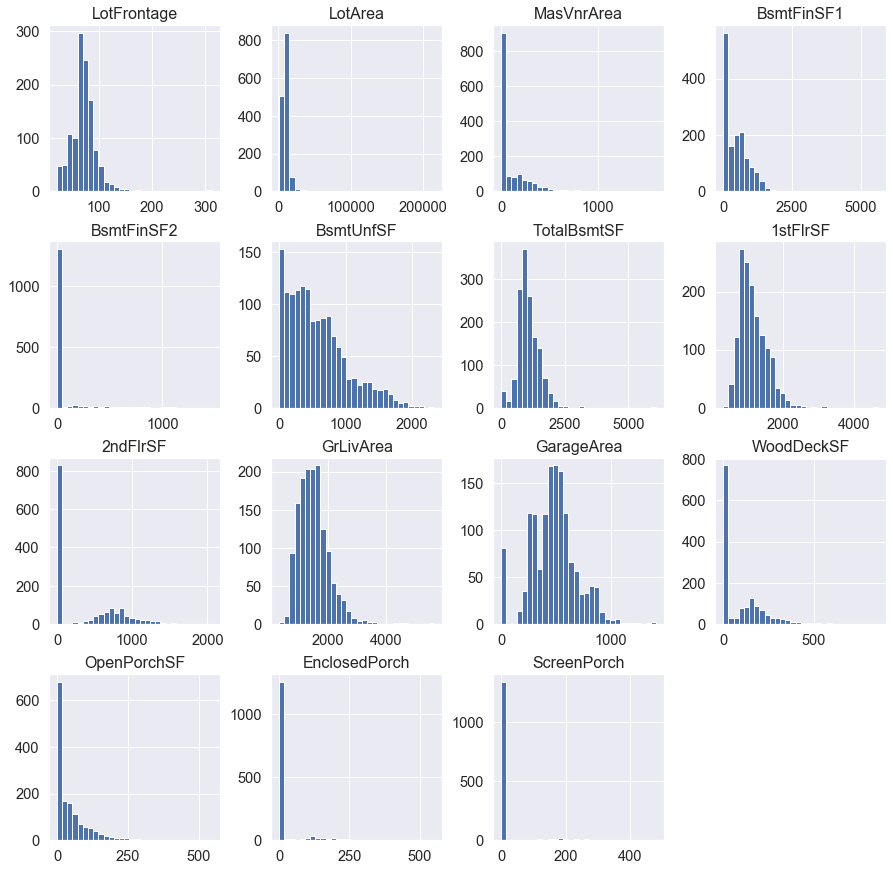

In [35]:
# plotting the contious variables

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Most of these variables are not normally distributed, some them are extremely skewed such as ScreenPorch and EnclosedPorch. We will apply binary transofmartion to the extremely skewed variables and for the rest we will apply Yeo-Johnson transformation. You can read more about Yeo-Johnson transformation here https://en.wikipedia.org/wiki/Power_transform
    
    

In [41]:
# List of skewed variables
Skewed_vars = ['ScreenPorch', 'EnclosedPorch']

#list of ther continous variables
cont_vars = [var for var in cont_vars if var not in Skewed_vars]


Let's analyse the distributions of the variables after applying a yeo-johnson transformation

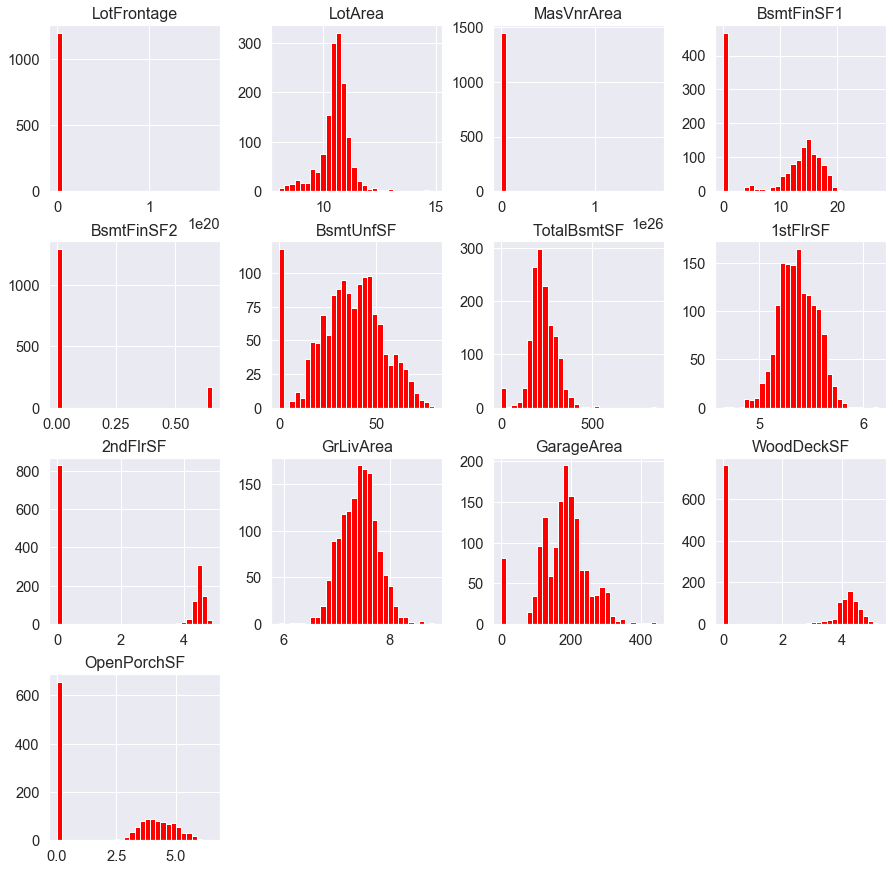

In [47]:
# create copy of the data
data_copy = data.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    data_copy[var], param = stats.yeojohnson(data[var])

# plot the histograms of the transformed variables
data_copy[cont_vars].hist(bins=30, figsize=(15,15), color='red')
plt.show()

For some of the variables, this transformstion did not do good job. For, some the spread seems to be evenly distributed. Whether this transformation improves 
the predictive power of the variables, we really need to train model. Anyways let plot scatter plots with the target variable fir the original variable and then the transfromed variables.


In [48]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


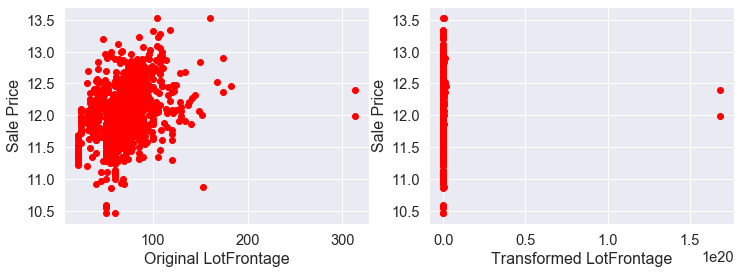

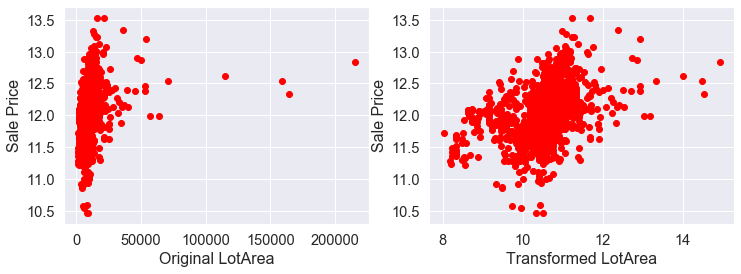

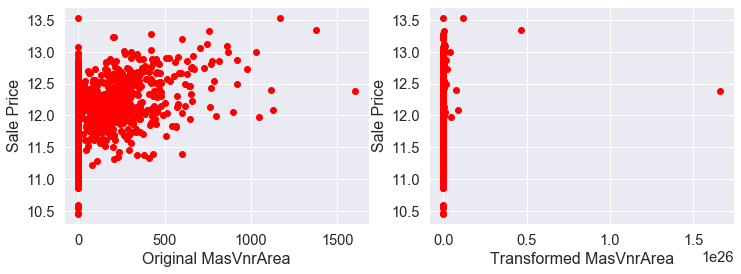

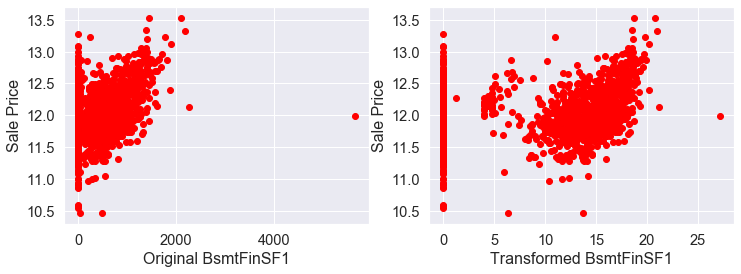

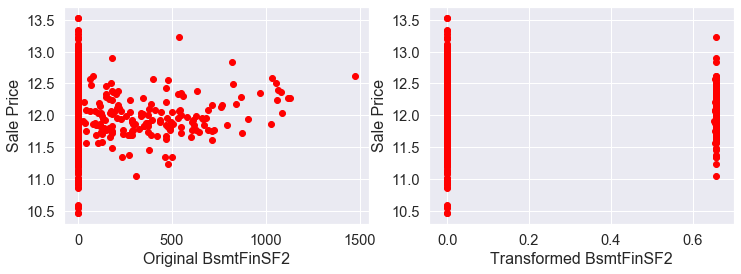

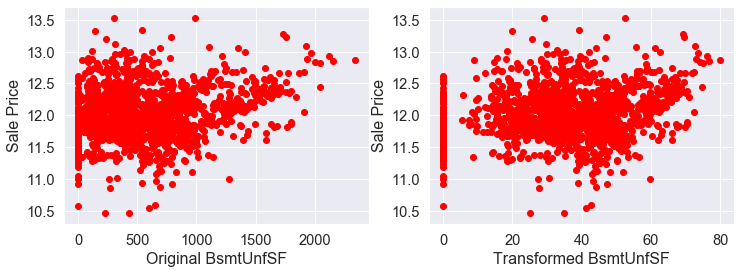

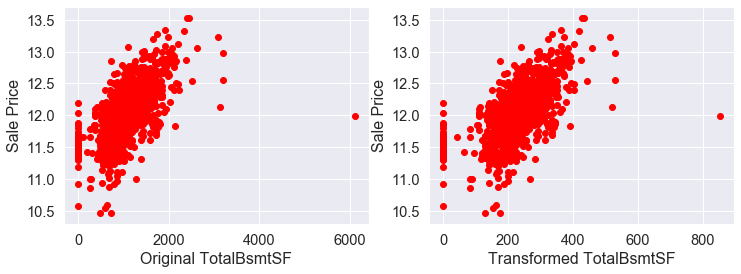

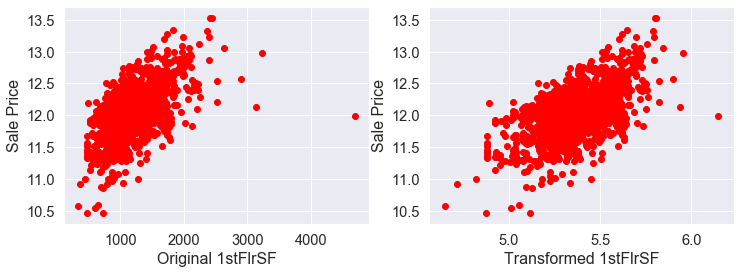

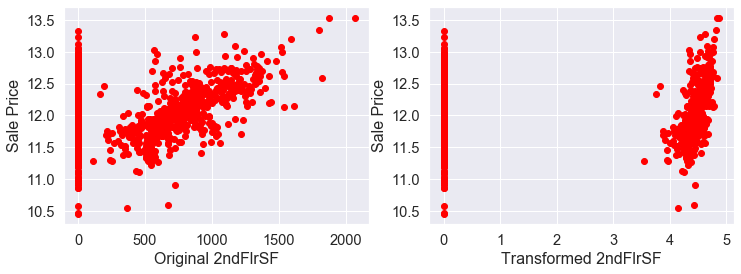

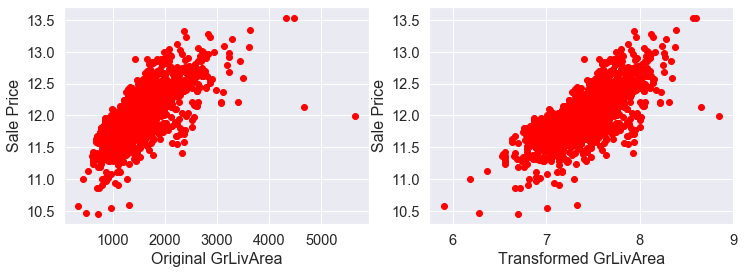

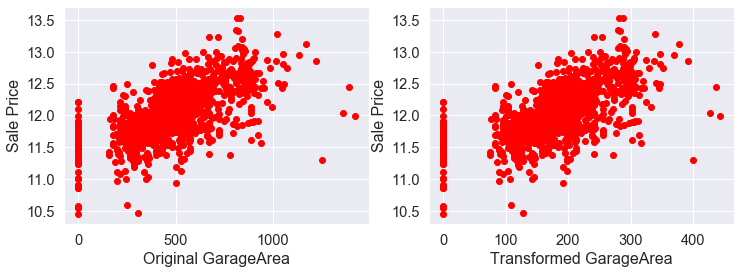

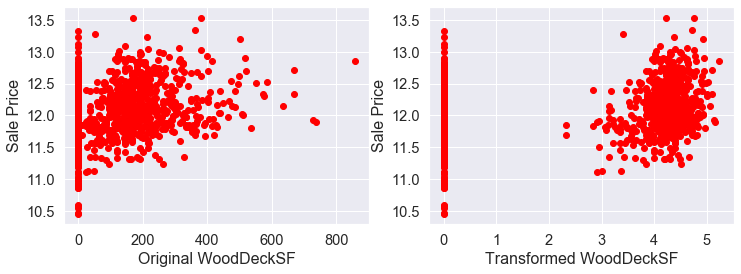

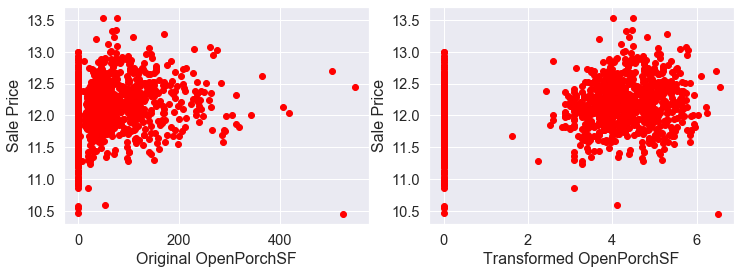

In [51]:

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    #original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']), color='red')
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(data_copy[var], np.log(data_copy['SalePrice']), color='red')
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

By looking at the plots, It seems like the transformation is imporving the relationships of LotArea with the target Sale Price

Lets do logarithmic trasformation for the following variables for which we don't have zero vales ["LotFrontage", "1stFlrSF", "GrLivArea"]
 

### Let's analyse the distributions of the variables after performing `Logarithmic Transformsation`

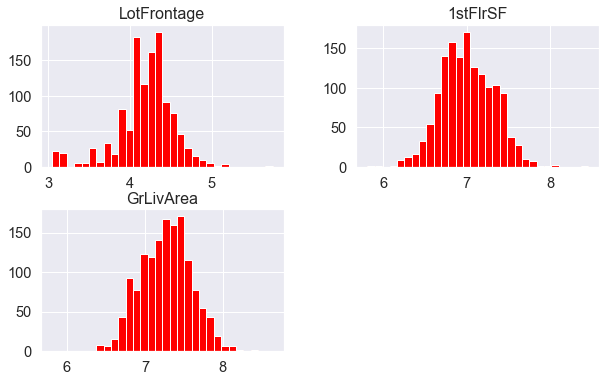

In [57]:
data_copy = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transform the variable with logarithm
    data_copy[var] = np.log(data[var])
    
data_copy[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30, color = 'red')
plt.show()

These trasformed variables seem to have better spread

lets analysis the relationship of these variables with the target Sale Price

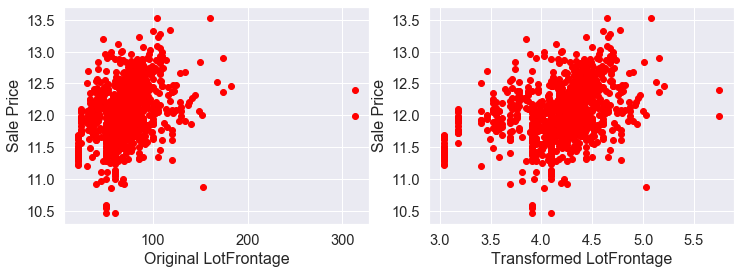

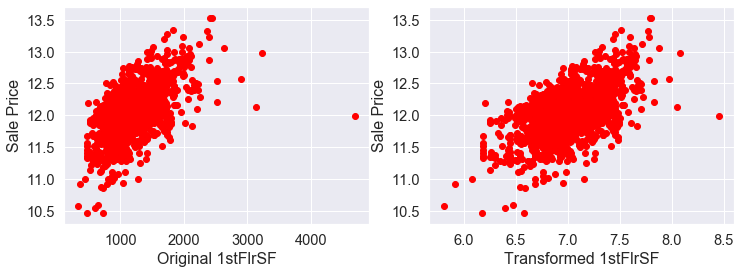

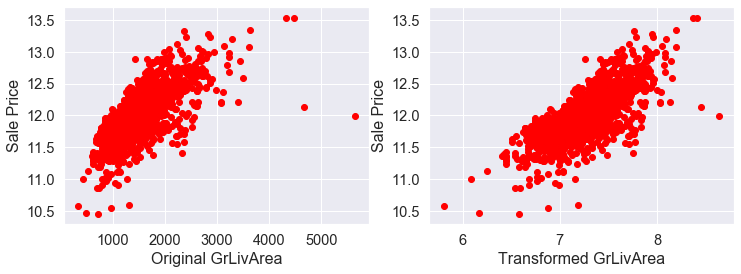

In [61]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']), color = 'red')
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(data_copy[var], np.log(data_copy['SalePrice']),color = 'red')
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

The transformed variables seems have to improved relationship with the target variable, they would have better predictive value

## Skewed variables

Transforming the skewed variables into binary variables and analyse how predictivity :


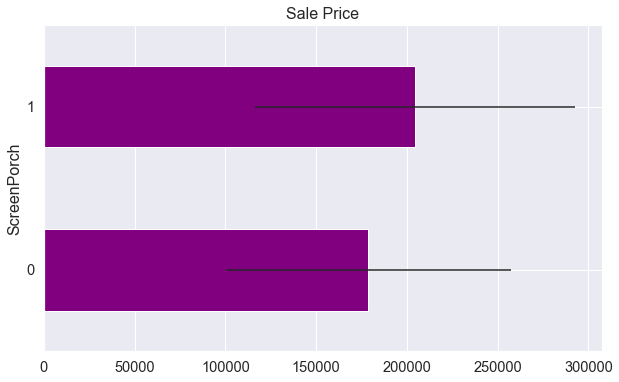

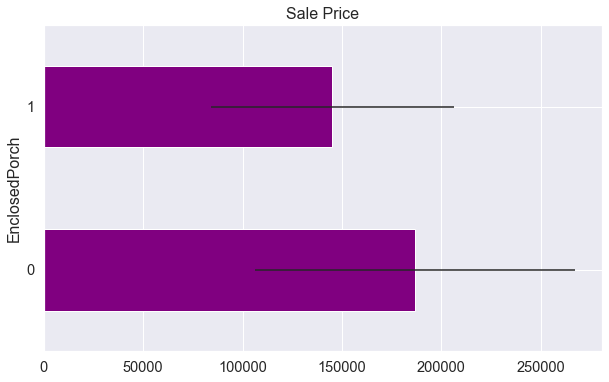

In [67]:
for var in Skewed_vars :
    
    data_copy = data.copy()
    
    # map the variable values into 0 and 1
    data_copy[var] = np.where(data[var]==0, 0, 1)
    
    # calulate mean sale price in the mapped values
    data_copy = data_copy.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    data_copy.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='purple')

    plt.show()

The mapped values have difference in Sale Price. The confidence intervals also overlap, so it looks these variables are not predictive of the Sale Price


### Analysing `Categorical` Variables

In [69]:
# Vizualizing the categorical variables
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


### cardinality of the variables

Let's vizualize the the number unique categories present in each variable

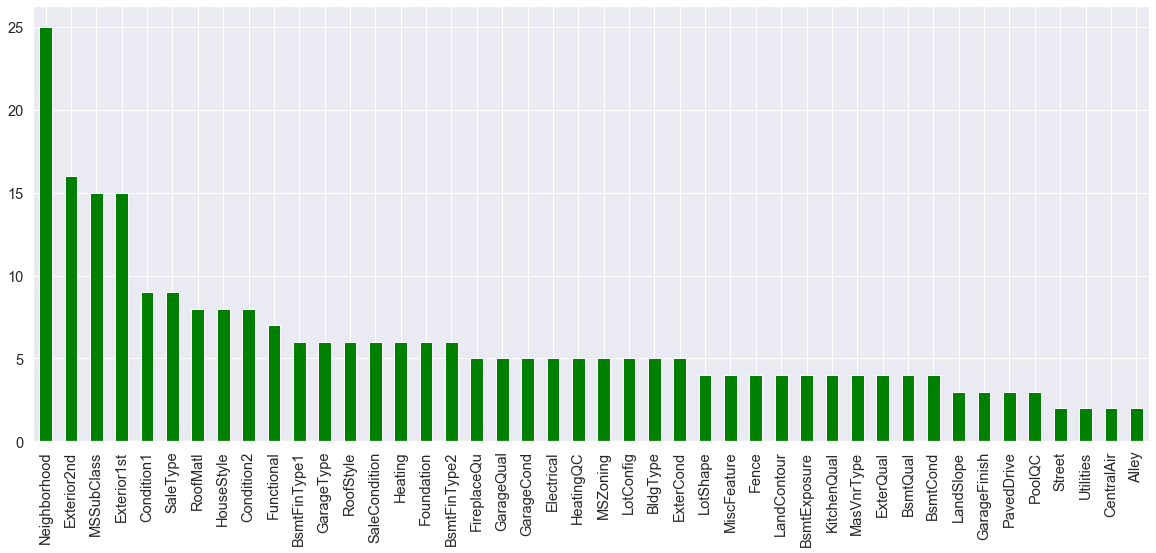

In [74]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(20,8), color = 'green')

All these variables seems to have low cardinality

## Handling `Quality variables`

Some variables suach as 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond' refer to the quality of the house . 
Lets replace these categories with numbers increasing with the quality of the place or room. 

Here are few of the mappings available in the kaggle website

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

Mappinngs strings to number by quality

In [75]:
maps_qual = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

vars_qual = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in vars_qual:
    data[var] = data[var].map(maps_qual)

In [76]:
maps_expos= {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var_expos = 'BsmtExposure'

data[var_expos] = data[var_expos].map(maps_expos)

In [79]:
maps_finish = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

vars_finish = ['BsmtFinType1', 'BsmtFinType2']

for var in vars_finish:
    data[var] = data[var].map(maps_finish)

In [78]:
maps_garage = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var_garage = 'GarageFinish'

data[var_garage] = data[var_garage].map(maps_garage)

In [ ]:
maps_fence = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var_fence = 'Fence'

data[var_fence] = data[var_fence].map(maps_fence)